In [1]:
import requests
requests.__version__

'2.26.0'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

46.18713582718681 -170.30400059187826
-81.62032900100724 -64.78566073785383
19.263351186503613 -60.926584104520416
-22.014966053494078 -47.581955713523655
-78.78370709402874 148.45523850407687
-84.65254831310097 -152.11582675669558
83.94216834229763 114.00433993443266
-83.16473491534276 -150.46753347225214
-73.80993032575657 -111.15856428009864
67.81729015401177 75.518926779526
-12.146369295984186 -101.64892161998641
74.42835865277405 167.09892138873056
-61.22490626843069 -50.30066934103655
16.35794574195228 86.56641677310267
-40.92014006948244 57.857468368081925
-78.30993573701748 175.65765381347558
3.91616139828227 82.5693699810472
70.41381348975455 -77.98341414003065
-80.07556109342073 -61.508695107142316
-84.39612228375493 -102.7466679588868
-21.898590303680606 -69.866959932639
60.59297761125461 131.63248923863853
4.835320408265744 68.81493672191266
75.29237474485794 11.812432326735404
0.21582863013095732 112.30015427877726
-27.61472275718485 -49.935023892219846
-55.67390024948154 

13.127590163436949 42.46862622152119
-23.95394966100855 -39.58994244755988
13.907821760439575 60.230065540620416
-17.00236315338715 -12.231800349505647
-35.57953485976703 -96.79538208190567
50.76324512531272 1.136935830360784
87.22267419749792 115.92146228612108
-70.75420204185744 -164.74402110764697
26.554421172291384 74.73487735723774
39.182819228602085 -24.508555408148908
49.617829160668464 126.22901798616903
-42.005759486625536 177.8283667154867
76.62258627601108 -172.10547250151237
-18.104461071925982 64.41843147107855
-37.85186930559654 -68.03174081993252
-11.413925245730283 96.53237065694486
24.248527605875708 161.31136268616143
-46.59585374346488 -54.67684105414213
78.63534873401926 -125.63920658645465
-80.8050705584132 116.08691351144904
-16.73043728603227 -36.60899820264058
-89.69856439931112 86.09079611382117
26.967400768180866 46.020123265966674
30.264876891726274 -118.89620281388031
-78.26421343687548 -176.9356660877539
49.88001381825569 11.0629896060301
75.5532988970617 -

39.49648664319491 92.09821259131388
-29.739779891478882 125.01417884023056
28.461822740272453 63.213847122109485
-84.08582317919692 77.96246472179757
22.271908751152893 -100.77740536046814
-7.4738521460217555 -168.6922284505679
-18.780264586555077 -167.05882342325597
-30.645679503781388 -69.76019051238629
-18.13998454475201 -109.87400102809583
-88.788987073874 -139.0676708878704
-73.71761089256239 -92.03817295602366
75.90114240094934 54.56551943131302
16.363288651059193 23.673460976635567
36.39531261490049 -20.393102320907417
52.895255515059915 -0.7167618907226938
-44.7698875260485 -4.934261811058036
85.83456902686524 -156.72646108739644
-55.28137973059997 119.48218493571937
15.97156700172387 -60.36654571383394
-50.99667657051417 23.824596032813787
44.83509310337678 -94.06517187413506
89.35204008326585 21.42173921520481
83.38600505330672 47.33615961424945
-36.33358607741999 -130.6789378369266
-64.92356796525618 -58.563062118867094
85.2772440350349 27.04830752188181
62.94695009926065 87

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb574116652698d6a1cc0511ed0af92b


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | descalvado
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | pangody
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | palasa
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | hambantota
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | tocopilla
Processing Record 18 of Set 1 | amga
Processing Record 19 of Set 1 | eydhafushi
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | sri aman
Processing Record 22 of Set 1 | otacilio costa
Processing Record 23 of Set 1 | chuy
Pr

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | xai-xai
Processing Record 42 of Set 4 | broken hill
Processing Record 43 of Set 4 | kuche
City not found. Skipping...
Processing Record 44 of Set 4 | zolskaya
City not found. Skipping...
Processing Record 45 of Set 4 | kajaani
Processing Record 46 of Set 4 | owando
Processing Record 47 of Set 4 | lalian
Processing Record 48 of Set 4 | sliac
City not found. Skipping...
Processing Record 49 of Set 4 | erzin
Processing Record 50 of Set 4 | tautira
Processing Record 1 of Set 5 | half moon bay
Processing Record 2 of Set 5 | chokwe
Processing Record 3 of Set 5 | mabaruma
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | svetlogorsk
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | tokur
Processing Record 9 of Set 5 | vryburg
Processing Record 10 of Set 5 | castro
Processing Record 11 of Set 5 | kame

Processing Record 31 of Set 8 | cherskiy
Processing Record 32 of Set 8 | zawadzkie
Processing Record 33 of Set 8 | muroto
Processing Record 34 of Set 8 | kristianstad
Processing Record 35 of Set 8 | whitehorse
Processing Record 36 of Set 8 | mocuba
Processing Record 37 of Set 8 | palomares
Processing Record 38 of Set 8 | jamkhed
Processing Record 39 of Set 8 | arroyo
Processing Record 40 of Set 8 | ruwi
Processing Record 41 of Set 8 | noumea
Processing Record 42 of Set 8 | lavrentiya
Processing Record 43 of Set 8 | harper
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | jiddah
City not found. Skipping...
Processing Record 46 of Set 8 | guisa
Processing Record 47 of Set 8 | egvekinot
Processing Record 48 of Set 8 | seymchan
Processing Record 49 of Set 8 | alotau
City not found. Skipping...
Processing Record 50 of Set 8 | panguna
Processing Record 1 of Set 9 | dafeng
Processing Record 2 of Set 9 | saleaula
City not found. Skipping...
Processing Record 3 of Set 9 

Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | pagudpud
Processing Record 21 of Set 12 | itarema
Processing Record 22 of Set 12 | pizarro
Processing Record 23 of Set 12 | warrington
Processing Record 24 of Set 12 | altay
Processing Record 25 of Set 12 | tahta
Processing Record 26 of Set 12 | bella union
Processing Record 27 of Set 12 | la maddalena
Processing Record 28 of Set 12 | hindaun
Processing Record 29 of Set 12 | matagami
Processing Record 30 of Set 12 | gawler
Processing Record 31 of Set 12 | celestun
Processing Record 32 of Set 12 | meyungs
City not found. Skipping...
Processing Record 33 of Set 12 | coos bay
Processing Record 34 of Set 12 | malwan
City not found. Skipping...
Processing Record 35 of Set 12 | nsanje
Processing Record 36 of Set 12 | hohhot
Processing Record 37 of Set 12 | kenai
Processing Record 38 of Set 12 | coahuayana
Processing Record 39 of Set 12 | deming
Processing Record 40 of Set 12

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,70.66,70,100,4.61,US,2022-05-12 13:20:26
1,Ushuaia,-54.8000,-68.3000,42.46,93,100,3.44,AR,2022-05-12 13:20:26
2,Codrington,-38.2667,141.9667,58.42,87,97,3.29,AU,2022-05-12 13:20:27
3,Descalvado,-21.9039,-47.6194,65.28,68,91,0.89,BR,2022-05-12 13:20:27
4,Hobart,-42.8794,147.3294,52.05,89,0,6.91,AU,2022-05-12 13:20:28
5,Mataura,-46.1927,168.8643,48.47,91,100,2.15,NZ,2022-05-12 13:20:28
6,Saskylakh,71.9167,114.0833,18.32,88,9,11.03,RU,2022-05-12 13:20:28
7,Punta Arenas,-53.1500,-70.9167,42.91,87,75,10.36,CL,2022-05-12 13:20:29
8,Pangody,65.8500,74.4859,38.30,100,100,8.34,RU,2022-05-12 13:20:29
9,Puerto Ayora,-0.7393,-90.3518,72.55,95,51,8.25,EC,2022-05-12 13:20:30


In [22]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= pd.DataFrame(city_data)[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-05-12 13:20:26,41.3712,-73.4140,70.66,70,100,4.61
1,Ushuaia,AR,2022-05-12 13:20:26,-54.8000,-68.3000,42.46,93,100,3.44
2,Codrington,AU,2022-05-12 13:20:27,-38.2667,141.9667,58.42,87,97,3.29
3,Descalvado,BR,2022-05-12 13:20:27,-21.9039,-47.6194,65.28,68,91,0.89
4,Hobart,AU,2022-05-12 13:20:28,-42.8794,147.3294,52.05,89,0,6.91
5,Mataura,NZ,2022-05-12 13:20:28,-46.1927,168.8643,48.47,91,100,2.15
6,Saskylakh,RU,2022-05-12 13:20:28,71.9167,114.0833,18.32,88,9,11.03
7,Punta Arenas,CL,2022-05-12 13:20:29,-53.1500,-70.9167,42.91,87,75,10.36
8,Pangody,RU,2022-05-12 13:20:29,65.8500,74.4859,38.30,100,100,8.34
9,Puerto Ayora,EC,2022-05-12 13:20:30,-0.7393,-90.3518,72.55,95,51,8.25


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

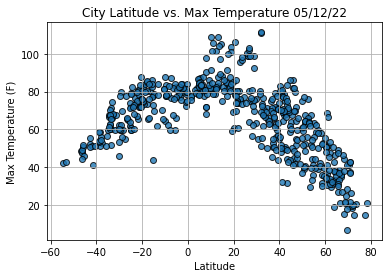

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

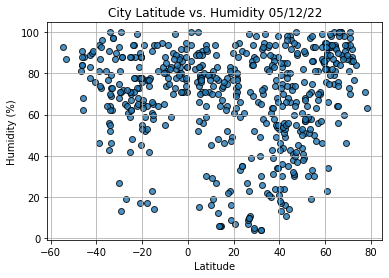

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

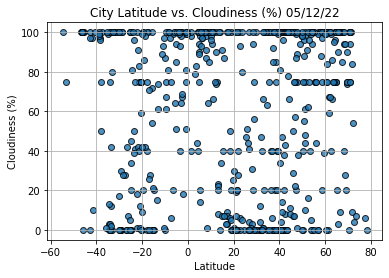

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

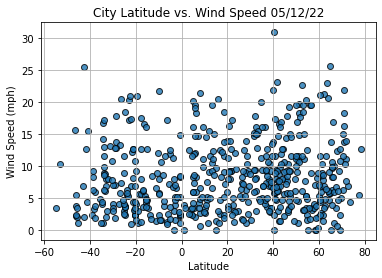

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13=city_data_df.loc[13]

In [33]:
index13

City                   Hambantota
Country                        LK
Date          2022-05-12 13:20:32
Lat                        6.1241
Lng                       81.1185
Max Temp                    81.81
Humidity                       79
Cloudiness                    100
Wind Speed                   18.3
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
540     True
541     True
542     True
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-05-12 13:20:26,41.3712,-73.4140,70.66,70,100,4.61
6,Saskylakh,RU,2022-05-12 13:20:28,71.9167,114.0833,18.32,88,9,11.03
8,Pangody,RU,2022-05-12 13:20:29,65.8500,74.4859,38.30,100,100,8.34
10,Pevek,RU,2022-05-12 13:20:30,69.7008,170.3133,6.89,94,74,5.06
11,Palasa,IN,2022-05-12 13:20:31,18.7667,84.4167,83.61,80,20,9.06


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

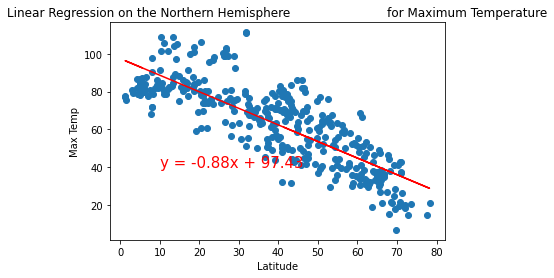

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

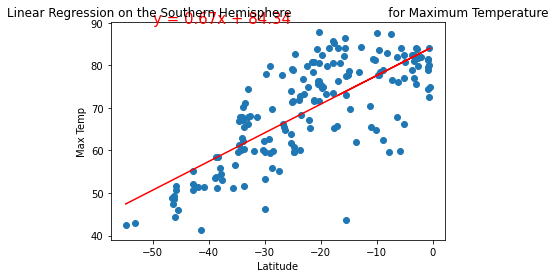

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

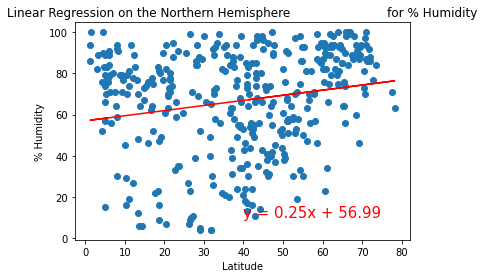

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

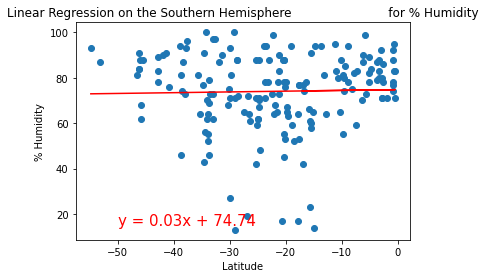

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

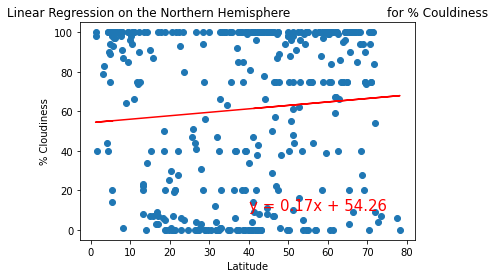

In [41]:
# Linear regression on the Northern Hemisphere on Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Couldiness', '% Cloudiness',(40,10))

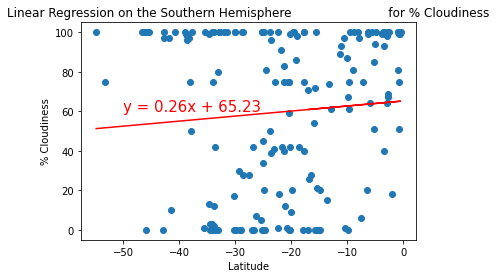

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

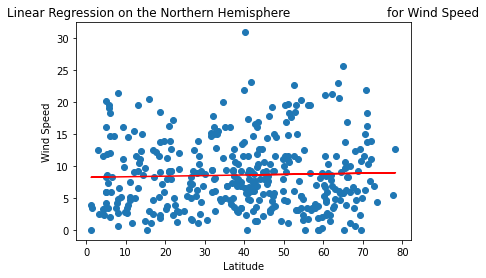

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

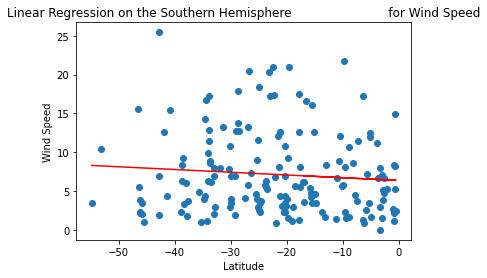

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))